# Air Quality Index - Linear Regression Model

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('/Users/shivaprakash/Dropbox/AirIndexQuality/AQI-Project-master/AQI-Project-master/Data/Real-Data/Real_Combine.csv')

In [5]:
data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 9 columns):
T         1093 non-null float64
TM        1093 non-null float64
Tm        1093 non-null float64
SLP       1093 non-null float64
H         1093 non-null float64
VV        1093 non-null float64
V         1093 non-null float64
VM        1093 non-null float64
PM 2.5    1092 non-null float64
dtypes: float64(9)
memory usage: 76.9 KB


/Users/shivaprakash/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/shivaprakash/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


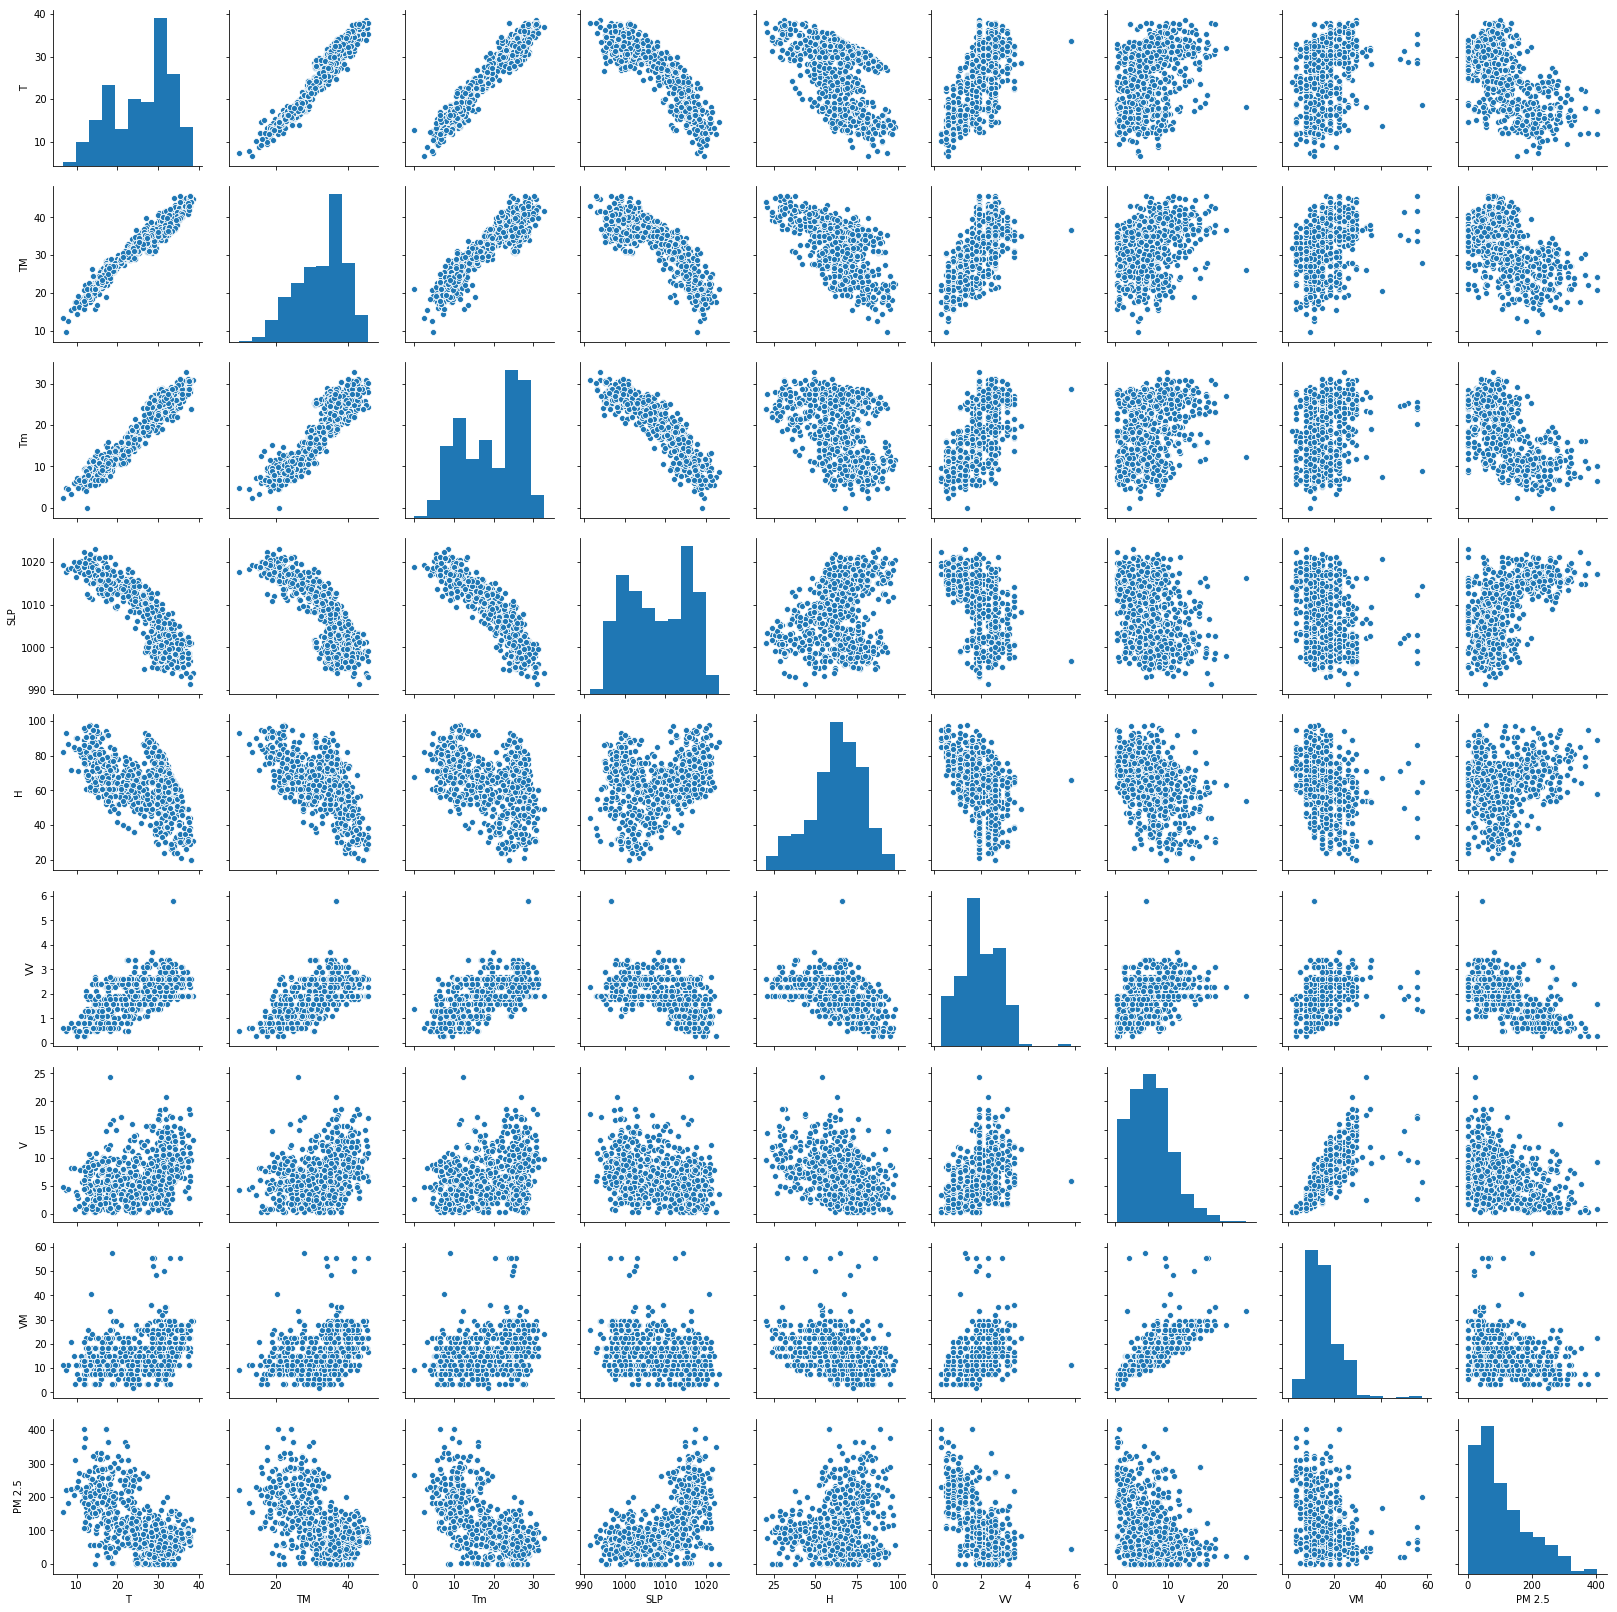

In [7]:
sns.pairplot(data=data,
    hue=None,
    hue_order=None,
    palette=None,
    vars=None,
    x_vars=None,
    y_vars=None,
    kind='scatter',
    diag_kind='auto',
    markers=None,
    height=2.5,
    aspect=1,
    dropna=True,
    plot_kws=None,
    diag_kws=None,
    grid_kws=None,
    size=None,
)

In [8]:
data.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967570,0.953703,-0.881698,-0.510593,0.640738,0.302349,0.288292,-0.631462
TM,0.967570,1.000000,0.891970,-0.823447,-0.588017,0.606746,0.293309,0.297590,-0.568409
Tm,0.953703,0.891970,1.000000,-0.917557,-0.288647,0.577382,0.296546,0.267249,-0.673824
SLP,-0.881698,-0.823447,-0.917557,1.000000,0.242307,-0.518015,-0.330155,-0.311231,0.623187
H,-0.510593,-0.588017,-0.288647,0.242307,1.000000,-0.465514,-0.380805,-0.362632,0.138005
VV,0.640738,0.606746,0.577382,-0.518015,-0.465514,1.000000,0.377029,0.342650,-0.573941
V,0.302349,0.293309,0.296546,-0.330155,-0.380805,0.377029,1.000000,0.775715,-0.268530
VM,0.288292,0.297590,0.267249,-0.311231,-0.362632,0.342650,0.775715,1.000000,-0.215854
PM 2.5,-0.631462,-0.568409,-0.673824,0.623187,0.138005,-0.573941,-0.268530,-0.215854,1.000000


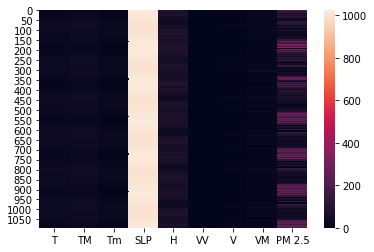

In [10]:
sns.heatmap(
    data=data,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None
)

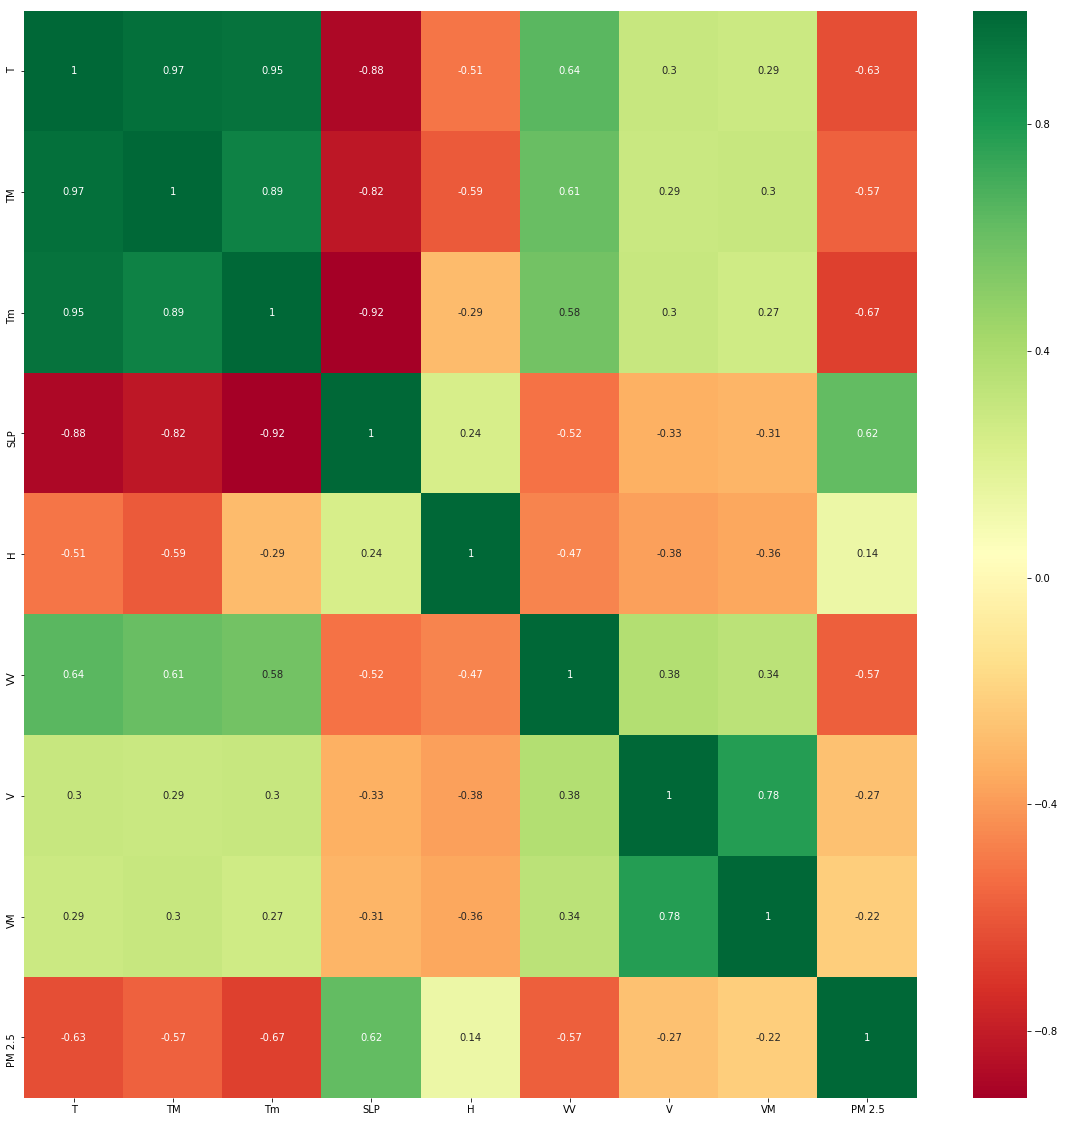

In [13]:
cormat=data.corr()
topFe=cormat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[topFe].corr(),annot=True,cmap='RdYlGn')

In [14]:
cormat.index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

In [26]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [17]:
X.index

RangeIndex(start=0, stop=1093, step=1)

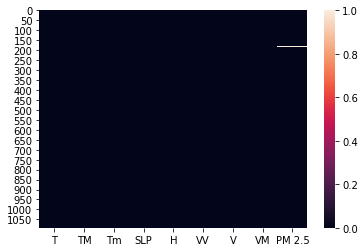

In [20]:
sns.heatmap(data.isnull())

In [22]:
data=data.dropna()

In [27]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

/Users/shivaprakash/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [28]:
model.feature_importances_

array([0.24854694, 0.08921222, 0.19463887, 0.13496072, 0.09208068,
       0.14577737, 0.05354666, 0.04123654])

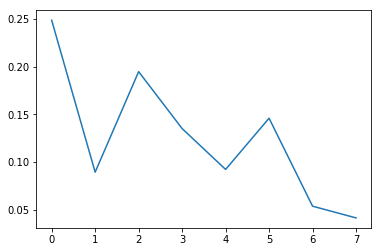

In [29]:
plt.plot(model.feature_importances_)

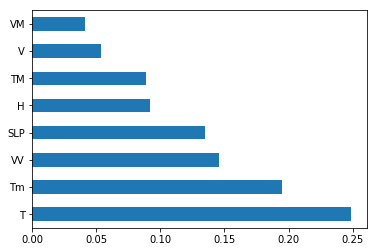

In [32]:
feaImp=pd.Series(model.feature_importances_,index=X.columns)
feaImp.nlargest(10).plot(kind='barh') #10 means top 10
plt.show()

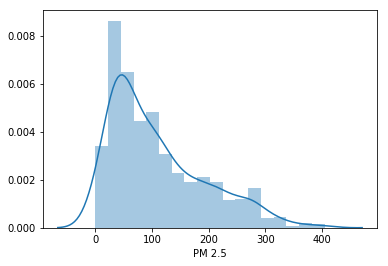

In [34]:
sns.distplot(y)

***Split Train and Test***

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,yTrain,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [36]:
from sklearn.linear_model import LinearRegression

In [38]:
regressor=LinearRegression()
regressor.fit(X_train,yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
regressor.score(X_train,yTrain)

0.551516808175875

In [40]:
regressor.score(X_test,y_test)

0.4852533130856789

In [41]:
from sklearn.model_selection import  cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [42]:
score.mean()

0.4710569304807392

**Model Evaluation**

In [43]:
coeffDf=pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])

In [44]:
pred=regressor.predict(X_test)

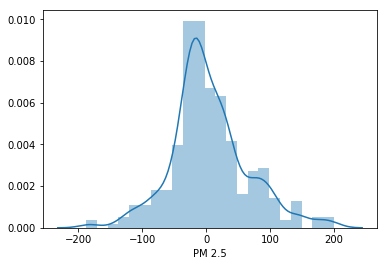

In [48]:
sns.distplot(y_test-pred)

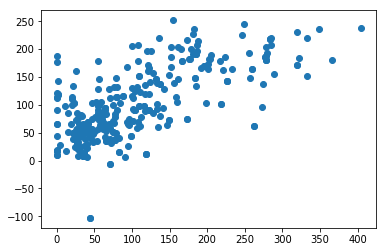

In [49]:
plt.scatter(y_test,pred)

***Finding RMSE***

In [50]:
from sklearn import metrics

In [51]:
np.sqrt(metrics.mean_squared_error(y_test,pred))

60.725143317512384

In [52]:
import pickle #like a black vox

In [53]:
file=open('regression.pkl','wb')

In [54]:
pickle.dump(regressor,file)